# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Предобработка данных

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

ceiling_height           9195 - Одна из причин, могли намеренно упустить высоту потолка, так как она не слишком большая, чтобы не отпугнуть покупателей. Можно оставить, как есть.
floors_total               86 - Пропусков мало, можно оставить
living_area              1903 - Жилая площадь нам важна, но заменить пропущенные значения нечем
kitchen_area              2278 - Важный параметр, но заменить нечем. Продавцы могут просто не знать точную цифру
locality_name              49 - пропусков мало, на исследование не повлияют
airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest,ponds_around3000,ponds_nearest  - похожие значения по пропускам, видимо не получена инфа с карт
days_exposition          3181 - эти данные важны, но заменить их нечем. Возможно это тех сбой, если используется одно и то же приложение на сдачу квартир, так как это должно выгружаться автоматически

In [4]:
data['balcony'].fillna(0.0, inplace=True)
data['balcony'].isna().sum()

0

In [5]:
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].isna().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Приведем названия столбцов к единому виду

In [7]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Преобразуем типы данных. Не может быть кол-во балконов нецелым числом, а копейки в last_price нелогичны.

In [8]:
data[['last_price', 'balcony']] = data[['last_price', 'balcony']].apply(lambda x: x.astype('int64'))
data[['last_price', 'balcony']].dtypes

last_price    int64
balcony       int64
dtype: object

Преобразуем дату к типу datetime

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Апартаменты либо есть, либо нет - это булев тип

In [10]:
data['is_apartment'] = data['is_apartment'].astype('boolean')
data['is_apartment'].dtypes

BooleanDtype

In [11]:
data[['total_area', 
      'ceiling_height', 
      'floors_total', 
      'living_area', 
      'kitchen_area', 
      'airports_nearest',
      'city_centers_nearest', 
      'parks_around_3000',
      'parks_nearest',
      'ponds_around_3000',
      'ponds_nearest',
      'days_exposition'
      ]] = data[['total_area', 
      'ceiling_height', 
      'floors_total', 
      'living_area', 
      'kitchen_area', 
      'airports_nearest',
      'city_centers_nearest', 
      'parks_around_3000',
      'parks_nearest',
      'ponds_around_3000',
      'ponds_nearest',
      'days_exposition'
      ]].apply(lambda x: x.astype('float32'))

In [12]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float32
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float32
floors_total                   float32
living_area                    float32
floor                            int64
is_apartment                   boolean
studio                            bool
open_plan                         bool
kitchen_area                   float32
balcony                          int64
locality_name                   object
airports_nearest               float32
city_centers_nearest           float32
parks_around_3000              float32
parks_nearest                  float32
ponds_around_3000              float32
ponds_nearest                  float32
days_exposition                float32
dtype: object

Проверим наличие явных дубликатов

In [13]:
data.duplicated().sum()

0

Проверим наличие неявных дубликатов

In [14]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [15]:
# заменяем поселок на посёлок через replace
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

In [16]:
data = data.replace({'locality_name':{'Никольское': 'село Никольское',
                                      'городской посёлок Советский':'посёлок городского типа Советский',
                                      'городской посёлок Большая Ижора':'посёлок городского типа Большая Ижора',
                                      'городской посёлок Лесогорский':'посёлок городского типа Лесогорский',
                                      'посёлок Рябово':'посёлок городского типа Рябово',
                                      'городской посёлок Мга':'посёлок городского типа Мга',
                                      'городской посёлок Павлово':'посёлок городского типа Павлово',
                                      'городской посёлок Назия':'посёлок городского типа Назия',
                                      'коттеджный посёлок Лесное':'посёлок Лесное',
                                      'Мурино':'посёлок Мурино',
                                      'Любань':'посёлок Любань',
                                      'городской посёлок Рощино':'посёлок городского типа Рощино',
                                      'деревня Кудрово':'Кудрово'
                                     }
                    }
                   )
                                      

Также есть города без имени, они не дают информации для анализа, удалим их

In [17]:
data = data.dropna(subset=['locality_name'])

In [18]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Новая Ладога', 'Отрадное', 'Павловск',
       'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск',
       'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Новоселье',
       'городской посёлок Свирьстрой', 'городской посёлок Фёдоровское',
       'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино'

Потолки больше 20-30 метров - это скорее всего аномальные значения. Посчитаем сколько таких значений

In [19]:
data.loc[data['ceiling_height'] >= 5, 'ceiling_height'].count()

37

In [20]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

Построим гистограмму, чтобы посмотреть получившееся распределение

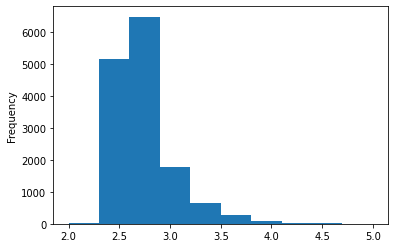

In [21]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(2,5))
plt.show()

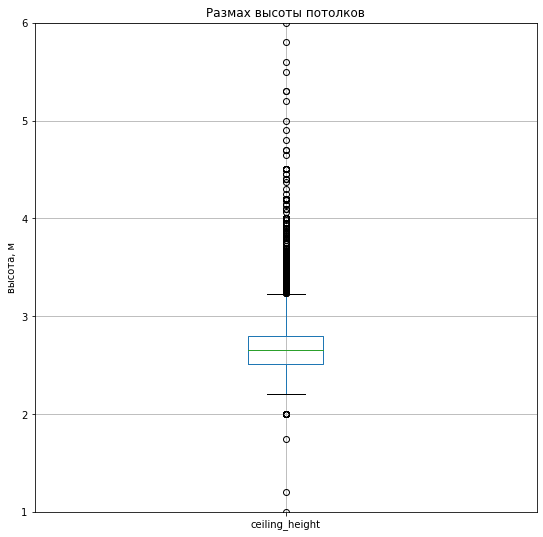

In [22]:
# Построим диаграмму размаха высоты потолков
data.boxplot(column='ceiling_height', figsize=(9, 9))
plt.title('Размах высоты потолков')
plt.ylim(1, 6)
plt.ylabel('высота, м')
plt.show()

Из графика видно, что в хвостах взялись потолки меньше, 2.5 метров и больше 5. Это скорее всего выбросы, заменим пропуски медианными значениями 

In [23]:
for locality in data['locality_name'].unique():
    median_value = data.loc[data['locality_name'] == locality, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality), 'ceiling_height'].median()

data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [24]:
data = data.query('2.5 <= ceiling_height <= 5')

### Посчитайте и добавьте в таблицу новые столбцы

In [25]:
data['one_square_meter_price'] = data['last_price']/data['total_area'].round(2)

In [26]:
data['day_of_publication'] = data['first_day_exposition'].dt.weekday
data['month_of_publication'] = data['first_day_exposition'].dt.month
data['year_of_publication'] = data['first_day_exposition'].dt.year

In [27]:
def get_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [28]:
data['floor_type'] = data.apply(get_floor_type, axis=1) 

In [29]:
data['distance_to_the_center'] = round(data['city_centers_nearest']/1000)

In [30]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_square_meter_price,day_of_publication,month_of_publication,year_of_publication,floor_type,distance_to_the_center
0,20,13000000,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.788947,1,12,2018,первый,19.0
2,10,5196000,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.000000,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

Начнем изучение с общей площади

In [31]:
data['total_area'].describe()

count    23560.000000
mean        60.327477
std         35.563828
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area, dtype: float64

Построим график, исключая выбросы, используя межквартильный диапазон. Мы объявляем наблюдение выбросом, если его значение в 1,5 раза больше, чем IQR, или в 1,5 раза меньше, чем IQR.

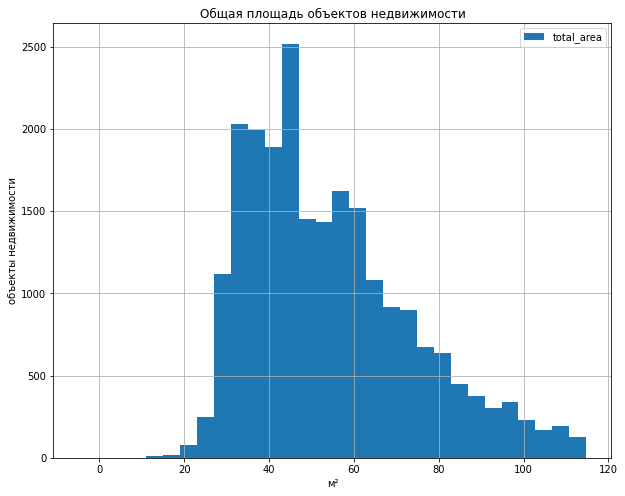

In [32]:
q1 = data['total_area'].quantile(.25) 
q3 = data['total_area'].quantile(.75) 
iqr = q3 - q1

data['total_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Значения находятся в диапазон до ~115 м². Больше всего значений в пределах от 30 до 65 м². Наблюдается пик около 45 м². Площадь меньше 30 и больше 100 квадратных метров - это редкость.

Жилая площадь

In [33]:
data['living_area'].describe()

count    21670.000000
mean        34.443184
std         22.008080
min          2.000000
25%         18.600000
50%         30.000000
75%         42.299999
max        409.700012
Name: living_area, dtype: float64

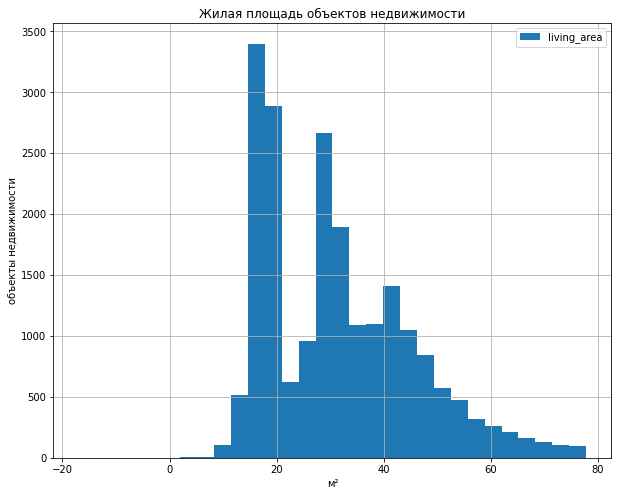

In [34]:
q1 = data['living_area'].quantile(.25) 
q3 = data['living_area'].quantile(.75) 
iqr = q3 - q1

data['living_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), legend=True)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Значения находятся в диапазоне ~до 78 квадратных метров. Наблюдается два пика около 18 и 30 квадратных метров. Больше всего объектов в диапазоне от 15 до 50 квадратных метров. Квартиры меньше 17 и больше 60 квадратных метров - это редкость. Среднее значение - 34 кв м. Есть хвост в районе больших, но редких значений - больше 60 кв м

Площадь кухни

In [35]:
data['kitchen_area'].describe()

count    21303.000000
mean        10.571219
std          5.894740
min          1.300000
25%          7.000000
50%          9.110000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

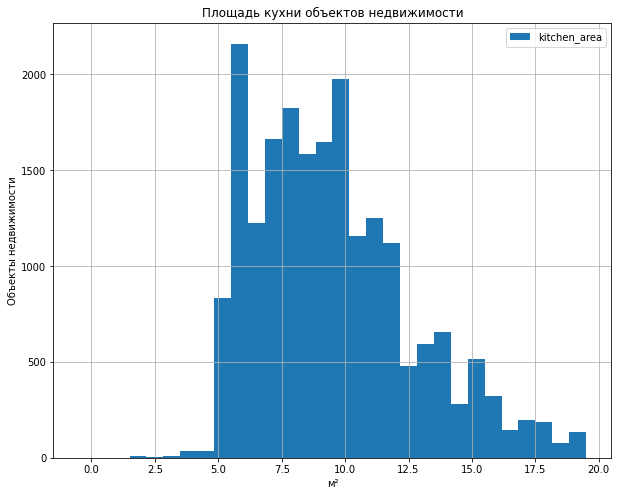

In [36]:
q1 = data['kitchen_area'].quantile(.25) 
q3 = data['kitchen_area'].quantile(.75) 
iqr = q3 - q1

data['kitchen_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), legend=True)
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('Объекты недвижимости')
plt.show()

Значения находятся в диапазоне ~до 19 кв м. Наблюдается пик около 6 и 9 кв метров. Больше всего кухонь в пределах от 5 до 12 кв м. Среднее значение около 10 кв м. Кухни меньше 5 встречаются редко. Есть хвост, где значения больше 16 кв метров.

Цена объекта

In [37]:
data['last_price'].describe()

count    2.356000e+04
mean     6.532933e+06
std      1.083303e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

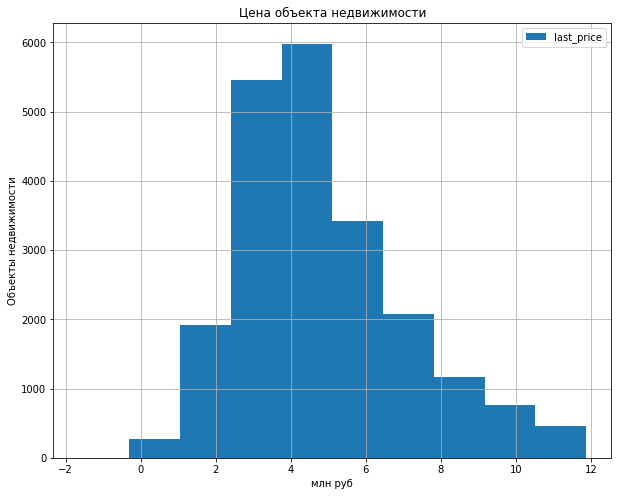

In [38]:
q1 = (data['last_price']/1000000).quantile(.25) 
q3 = (data['last_price']/1000000).quantile(.75) 
iqr = q3 - q1

(data['last_price']/1000000).hist(bins=10, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), legend=True)
plt.title('Цена объекта недвижимости')
plt.xlabel('млн руб')
plt.ylabel('Объекты недвижимости')
plt.show()

Диапазон значений ~до 12 млн руб. Наблюдается пик в районе 3,5 млн. Больше всего вариантов от 3 до 5 млн руб. Среднее значение - 6,5 млн, медиана - 4,6. Квартиры дороже 10 млн - редкость. Небольшой хвост в районе больших значений. 

Количество комнат

In [39]:
data['rooms'].describe()

count    23560.000000
mean         2.070034
std          1.078726
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

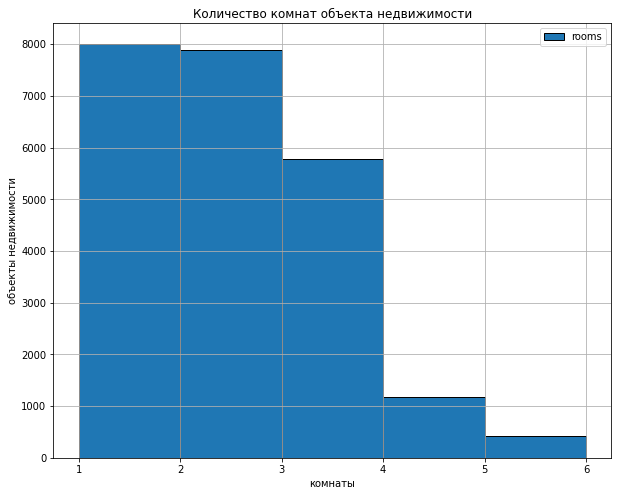

In [40]:
q1 = data['rooms'].quantile(.25)
q3 = data['rooms'].quantile(.75) 
iqr = q3 - q1 

data['rooms'].hist(bins=5, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Количество комнат объекта недвижимости')
plt.xlabel('комнаты')
plt.ylabel('объекты недвижимости')
plt.show()

Кол-во комнат находится в диапазоне от 1 до 6 комнат. Больше всего однокомнатных квартир и двухкомнатных квартир. Затем идут трехкомнатные. 4, 5 и 6 комнатные квартиры встречаются редко. Среднее и медиана - 2 комнаты

Высота потолков

In [41]:
data['ceiling_height'].describe()

count    23560.000000
mean         2.697023
std          0.214896
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

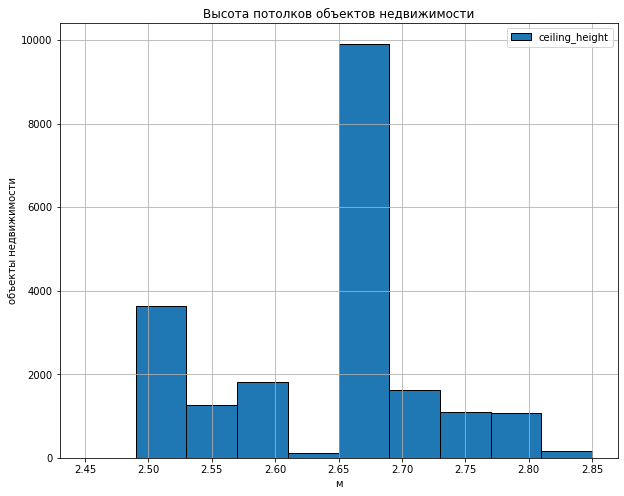

In [42]:
q1 = data['ceiling_height'].quantile(.25) 
q3 = data['ceiling_height'].quantile(.75) 
iqr = q3 - q1

data['ceiling_height'].hist(bins=10, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Диапазон значений примерно от 2,2 м до 3,23. Самые распространенные варианты от 2,45 до 2,65 метров. Чуть меньше от 2,65 до 2,78. Среднее 2,7, медиана - 2,65. С высотой от 2,78 метров до 3,23 встречаются редко.

Этаж квартиры

In [43]:
data['floor'].describe()

count    23560.000000
mean         5.897835
std          4.887881
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

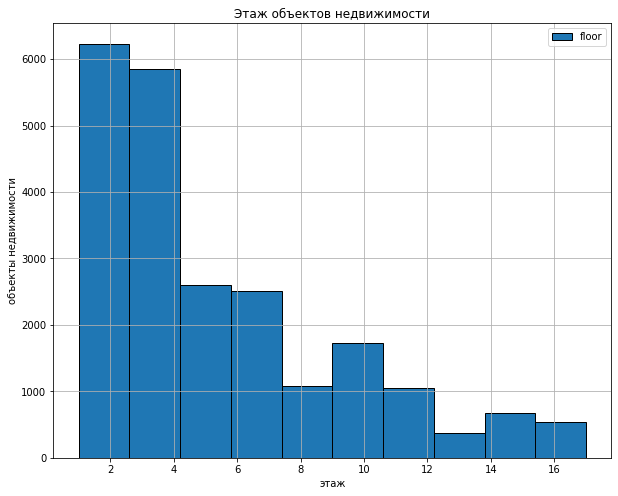

In [44]:
q1 = data['floor'].quantile(.25) 
q3 = data['floor'].quantile(.75) 
iqr = q3 - q1 

data['floor'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Этаж объектов недвижимости')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Значения находятся в диапазоне до 17 этажей. Больше всего вариантов от 1 до 4 этажей. Меньше от 4 до 7. Редко встречаются 12-17-этажные дома. Среднее - 6, медиана - 4. 

Тип этажа квартиры

In [45]:
data['floor_type'].describe()

count      23560
unique         3
top       другой
freq       17356
Name: floor_type, dtype: object

In [46]:
data['floor_type'].value_counts() #посчитаем сколько каких квартир на каких этажах

другой       17356
последний     3307
первый        2897
Name: floor_type, dtype: int64

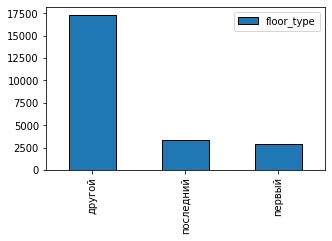

In [47]:
data['floor_type'].value_counts().plot.bar(figsize=(5, 3), ec='black', legend=True)
plt.show()

Значения квартир на первом и последнем этаже примерно одинаковые. В основном объекты располагаются между первым и последним этажами 

Общее количество этажей в доме

In [48]:
data['floors_total'].describe()

count    23475.000000
mean        10.686901
std          6.597428
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

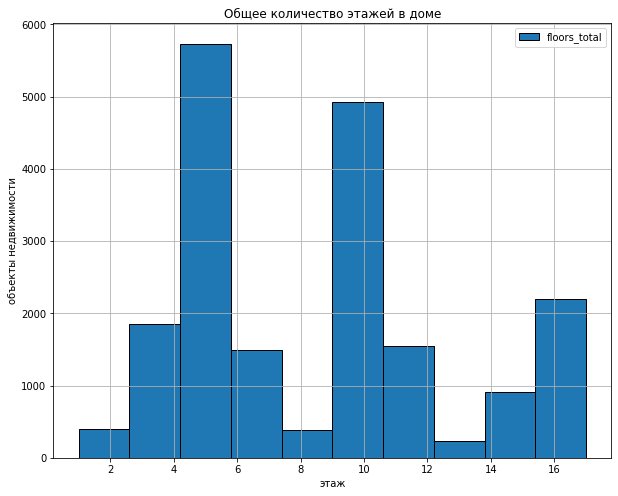

In [49]:
q1 = data['floor'].quantile(.25)
q3 = data['floor'].quantile(.75)
iqr = q3 - q1

data['floors_total'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Значения располагаются в пределах до 17 этажей. Больше всего 5-этажных и 9-этажных домов. Среднее значение - 10, медиана - 9.

Расстояние до центра города в метрах

In [50]:
data['distance_to_the_center'].describe()

count    18081.000000
mean        14.192136
std          8.615138
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: distance_to_the_center, dtype: float64

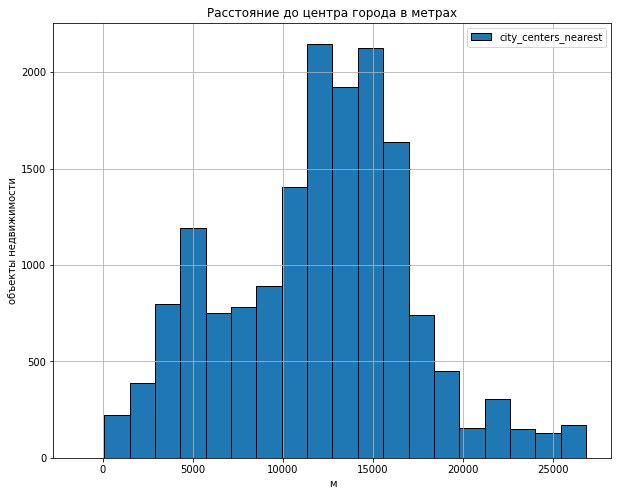

In [51]:
q1 = data['city_centers_nearest'].quantile(.25)
q3 = data['city_centers_nearest'].quantile(.75)
iqr = q3 - q1

data['city_centers_nearest'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Значения находятся в диапазоне ~до 27000 м. Большинство объектов находятся в пределах от 10 км до 17 км от центра. Среднее - 14 км, медиана - 13 км. 

Расстояние до ближайшего аэропорта

In [52]:
data['airports_nearest'].describe()

count    18058.000000
mean     28810.197266
std      12640.252930
min          0.000000
25%      18576.000000
50%      26763.500000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

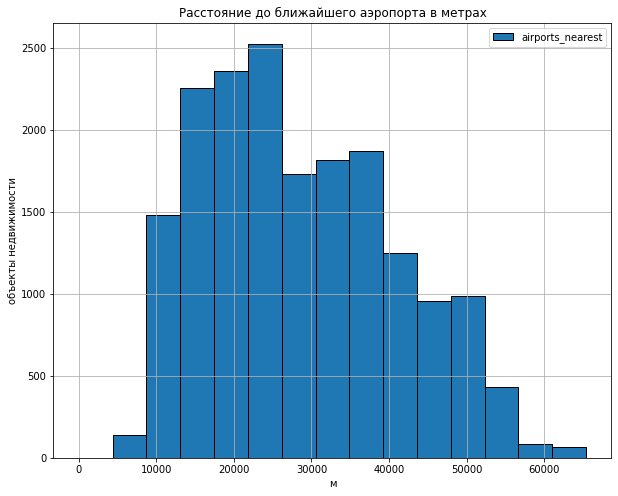

In [53]:
q1 = data['airports_nearest'].quantile(.25) 
q3 = data['airports_nearest'].quantile(.75)
iqr = q3 - q1 

data['airports_nearest'].hist(bins=15, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Значения находятся в пределах до 65 км от аэропорта. Самый распространенный вариант - 23 км от аэропорта. Больше всего вариантов от 13 до 27~ км. Меньше от 27 до 40 км до аэропорта. Хвост на значениях больше 55 км от аэропорта

Расстояние до ближайшего парка

In [54]:
data['parks_nearest'].describe()

count    8027.000000
mean      490.935089
std       343.123047
min         1.000000
25%       287.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

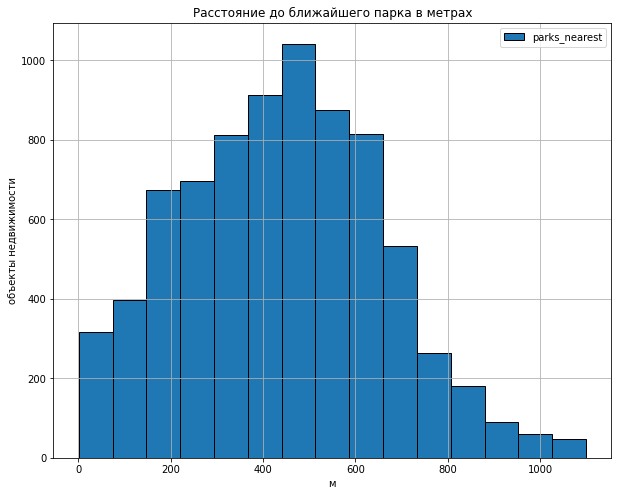

In [55]:
q1 = data['parks_nearest'].quantile(.25)
q3 = data['parks_nearest'].quantile(.75)
iqr = q3 - q1 

data['parks_nearest'].hist(bins=15, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Значения находятся в пределах от 1100 метров примерно. Пик около 500 метров. Среднее - 500 метров, медиана - 450 метров. Больше всего значений от 200 до 600 метров. Значения больше 800 метров встречаются редко. 

День и месяц публикации объявления

In [56]:
data['day_of_publication'].describe()

count    23560.000000
mean         2.568930
std          1.788323
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_publication, dtype: float64

In [57]:
data['day_of_publication'].value_counts().sort_values()

6    1681
5    1931
0    3588
2    3951
4    3978
1    4162
3    4269
Name: day_of_publication, dtype: int64

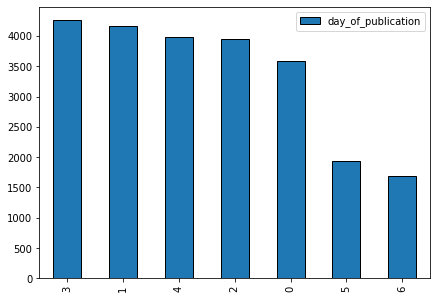

In [58]:
data['day_of_publication'].value_counts().plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

Больше всего публикаций Чаще всего публиковали в будние дни, реже в выходные 

In [59]:
data['month_of_publication'].describe()

count    23560.000000
mean         6.400806
std          3.491649
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_of_publication, dtype: float64

In [60]:
data['month_of_publication'].value_counts().sort_values()

5     1264
1     1486
12    1633
7     1684
8     1734
6     1748
9     1972
10    2115
11    2356
4     2365
3     2573
2     2630
Name: month_of_publication, dtype: int64

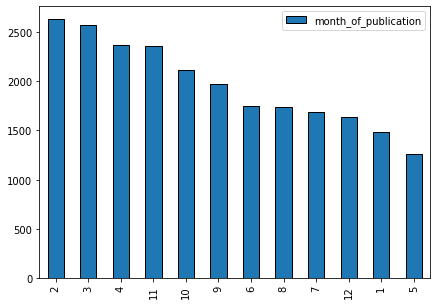

In [61]:
data['month_of_publication'].value_counts().plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

Больше всего публикаций после январских праздников в феврале. Меньше всего в январе и мае. Видимо в праздники все отдыхают :)

In [62]:
data['year_of_publication'].describe()

count    23560.000000
mean      2017.369907
std          1.038118
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_of_publication, dtype: float64

In [63]:
data['year_of_publication'].value_counts().sort_values()

2014     136
2015    1169
2016    2755
2019    2871
2017    8155
2018    8474
Name: year_of_publication, dtype: int64

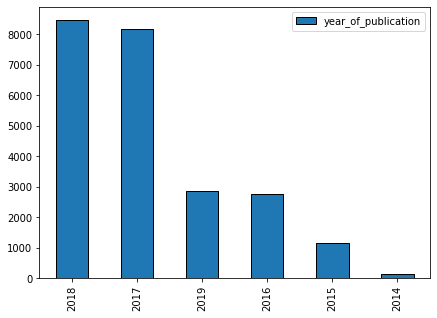

In [64]:
data['year_of_publication'].value_counts().plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

Больше всего публикаций в 2018 и чуть меньше в 2017 году. 
Далее сильно падение почти в 1/3 - 2019 и 2016 годы. В 2014 году было крайне мало публикаций

Как быстро продавались квартиры

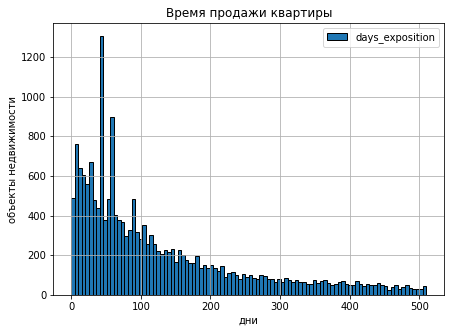

In [65]:
q1 = data['days_exposition'].quantile(.25)
q3 = data['days_exposition'].quantile(.75) 
iqr = q3 - q1

data['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

Пики около 50-60 дней. Изменим масштаб значений, чтобы рассмотреть получше область и не рассматривать хвост. 

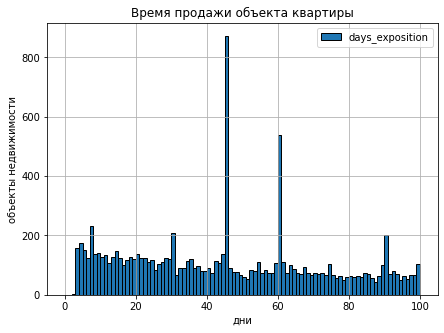

In [66]:
data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

Из графика видно, что чаще всего продают квартирые за 45 и 60 дней. Хотя, возможно квартира не была продана, а просто снята с объявления. 

In [67]:
data['days_exposition'].describe()

count    20393.000000
mean       180.819000
std        219.943588
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи квартиры около 181 дня. Медианное - 95. Максимум - 1580 дней. Среднее значение отличается от медианного в 2 раза, а также стандартное отклонение превышает среднее значение, что говорит о большом кол-ве выбросов. На графике большой хвост в районе больших значений. 

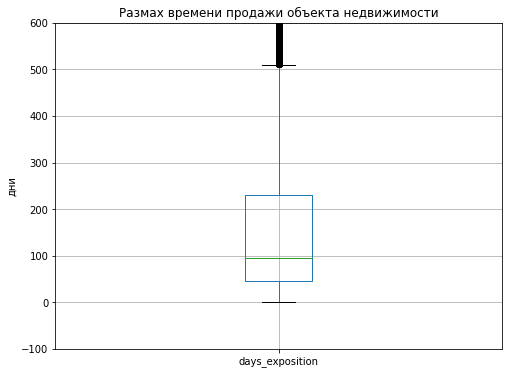

In [68]:
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(-100, 600)
plt.ylabel('дни')
plt.show()

In [69]:
boundary_of_normal_values = q3 + 1.5 * iqr
print(boundary_of_normal_values)
data_new = data.query('days_exposition < 512')

510.0


Убрали из данных строки с аномальными значениями - продажи после 512 дней.
До 45 дней - квартиры продаются быстро, от 45 до 231 - средне, и долго от 230 до 512. 

Факторы, влияющие на на общую (полную) стоимость объекта

In [70]:
data_new.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'one_square_meter_price',
       'day_of_publication', 'month_of_publication', 'year_of_publication',
       'floor_type', 'distance_to_the_center'],
      dtype='object')

In [71]:
#параметры, которые будем проверять
check_param = [
    'last_price',
    'total_area',
    'rooms',
    'city_centers_nearest',
    ]
#названия параметров
param_labels = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'количество комнат',
    'расстояние\nдо центра города',
    ]

corr_matrix = data_new[check_param].corr()

display(corr_matrix)

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.629751,0.342159,-0.183517
total_area,0.629751,1.000000,0.756280,-0.214624
rooms,0.342159,0.756280,1.000000,-0.170752
city_centers_nearest,-0.183517,-0.214624,-0.170752,1.000000


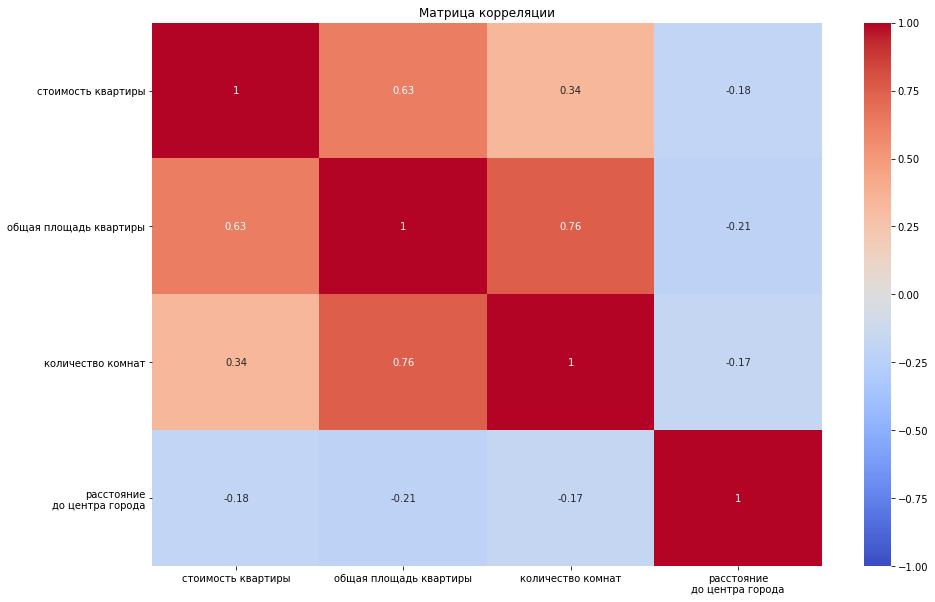

In [72]:
plt.figure(figsize = (15, 10))
seaborn.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=param_labels,
            xticklabels=param_labels)
plt.title('Матрица корреляции')
plt.show()

У меня здесь нет этажей, график для них и так был отдельно, а ниже графики для дат. Отсюда даты убрала

Наибольшая связь между стоимостью квартиры и ее площадью - линейная пропорциональность. 
Также положительная линейная связь наблюдается между стоимостью квартиры и кол-вом комнат. Чем больше комнат, тем больше стоимость квартир. 
Есть слабая отрицательная связь между расстоянием до центра. Чем меньше расстояние, тем больше стоимость квартиры

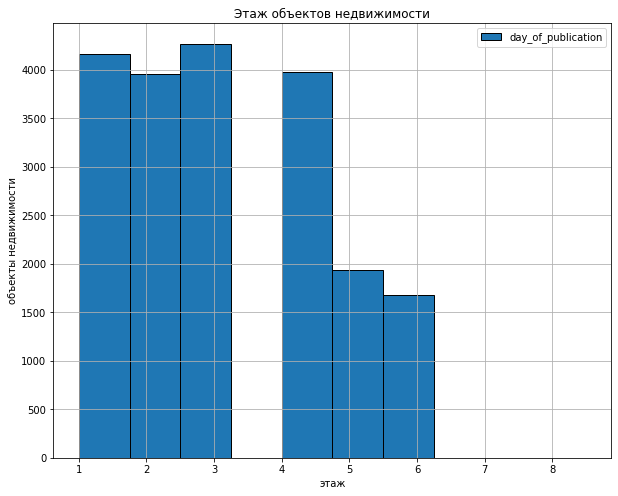

In [73]:
q1 = data['day_of_publication'].quantile(.25) # первый квартиль Q1
q3 = data['day_of_publication'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
data['day_of_publication'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Этаж объектов недвижимости')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

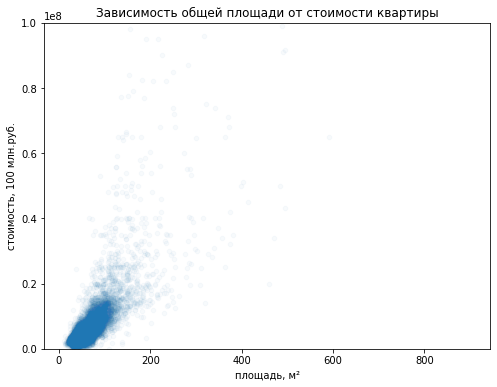

In [74]:
data_new.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Больше всего квартир стоимостью до 20 млн руб и площадью до 150 кв м. Зависимость прямопропорциональная. Чем больше площадь квартиры, тем выше цена. 

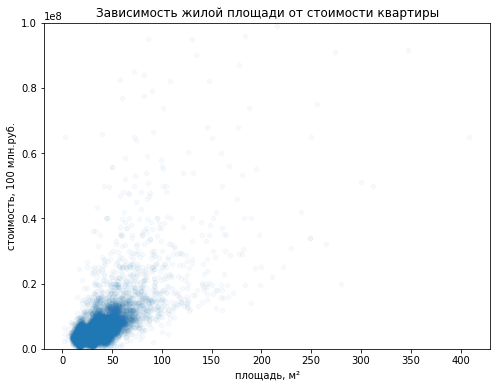

In [75]:
data_new.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость жилой площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Больше всего квартир стоимостью до 20 млн руб и жилой площадью до 75 кв м. Зависимость прямопропорциональная. Чем больше жилая площадь квартиры, тем выше цена. 

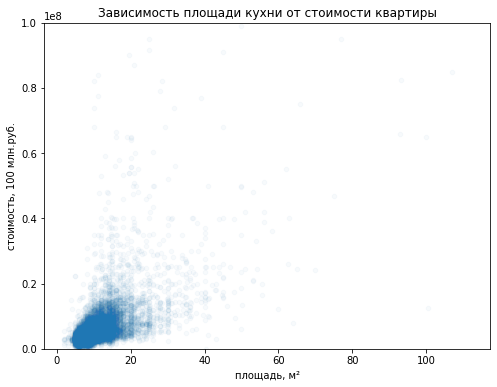

In [76]:
data_new.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость площади кухни от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Больше всего квартир стоимостью до 20 млн руб и площадью кухонь до 20 кв м. Зависимость прямопропорциональная. Чем больше площадь кухни, тем выше цена. 

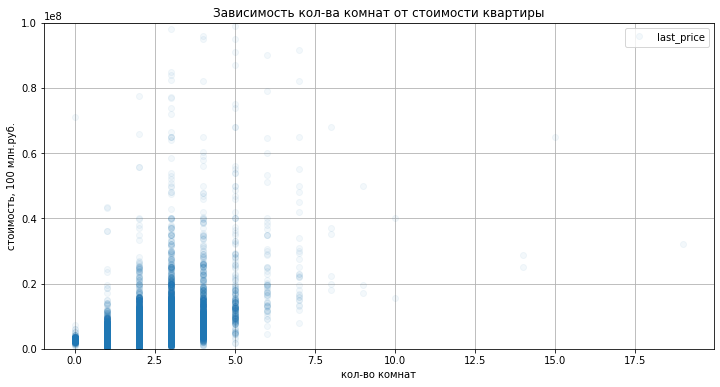

In [77]:
data_new.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.05)
plt.title('Зависимость кол-ва комнат от стоимости квартиры')
plt.xlabel('кол-во комнат')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Больше всего квартир стоимостью до 20 млн руб и кол-вом комнат от 1 до 3. Зависимость прямопропорциональная для этого кол-ва комнат. Для 3 и 4 примерно одинаковая. Далее стоимость снижается. Возможно комнат много, но они сами по себе маленькие 

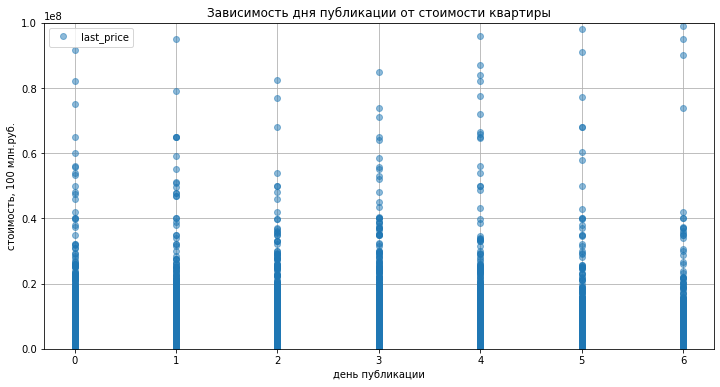

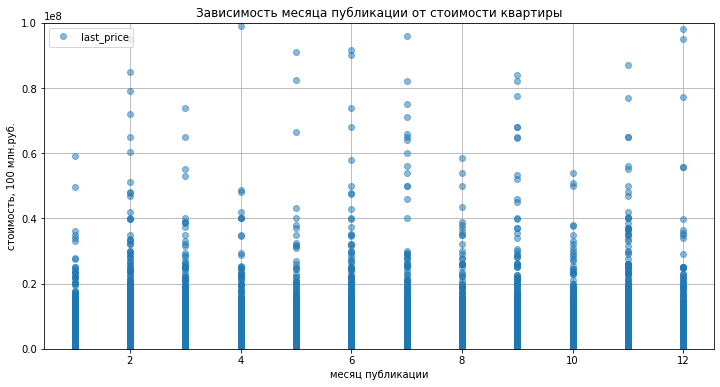

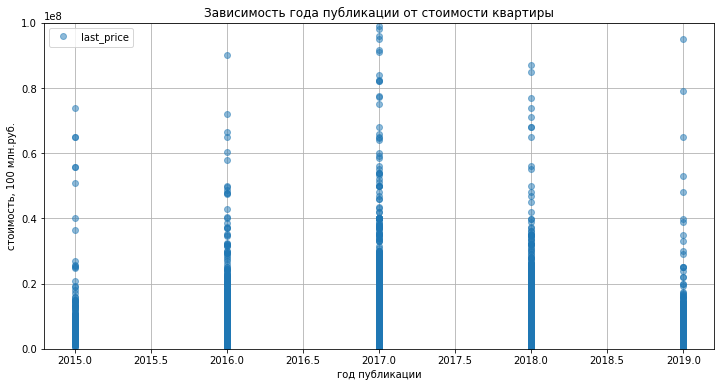

In [78]:
data_new.plot(x = 'day_of_publication', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость дня публикации от стоимости квартиры')
plt.xlabel('день публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

data_new.plot(x = 'month_of_publication', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость месяца публикации от стоимости квартиры')
plt.xlabel('месяц публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

data_new.plot(x = 'year_of_publication', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость года публикации от стоимости квартиры')
plt.xlabel('год публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

График не наглядный, проведем другой анализ

,mean,count,median
day_of_publication,,,
0,6.069564e+06,2783,4500000
1,5.932075e+06,3290,4500000
2,6.173575e+06,3091,4500000
3,6.115982e+06,3408,4500000
4,5.857074e+06,3261,4450000
5,6.894438e+06,1542,4500000
6,5.901736e+06,1353,4450000


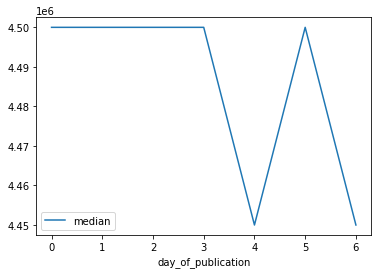

In [79]:
pivot_table_day_of_publication = data_new.pivot_table(index = 'day_of_publication', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_day_of_publication.columns = ['mean', 'count', 'median']
pivot_table_day_of_publication.plot(y = 'median', legend=True)
pivot_table_day_of_publication

В течение недели цена находятся в пределах 4,45 - 4,5 миллионов, просадка в пятницу и воскресение.

,mean,count,median
month_of_publication,,,
1,5.807191e+06,1167,4500000
2,6.061731e+06,2122,4500000
3,5.739019e+06,1758,4445000
4,6.569209e+06,1376,4500000
5,6.323846e+06,1012,4489500
6,5.994150e+06,1510,4300000
7,6.200865e+06,1456,4500000
8,5.946537e+06,1507,4500000
9,6.553587e+06,1714,4594500


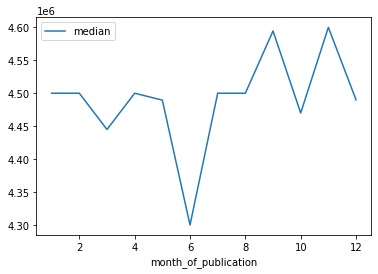

In [80]:
pivot_table_month_of_publication = data_new.pivot_table(index = 'month_of_publication', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_of_publication.columns = ['mean', 'count', 'median']
pivot_table_month_of_publication.plot(y = 'median', legend=True)
pivot_table_month_of_publication

Цены квартир падают вначале лета, всплеск в сентябре и ноябре

,mean,count,median
year_of_publication,,,
2015,7.612159e+06,464,4885000
2016,6.552343e+06,2085,4500000
2017,6.367727e+06,7577,4450000
2018,5.619500e+06,7520,4499000
2019,5.868320e+06,1082,4784750


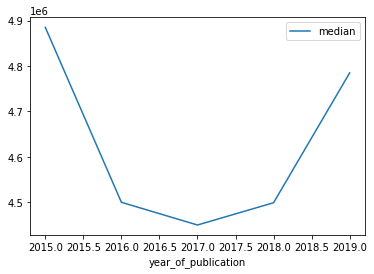

In [81]:
pivot_table_year_of_publication = data_new.pivot_table(index = 'year_of_publication', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_of_publication.columns = ['mean', 'count', 'median']
pivot_table_year_of_publication.plot(y = 'median', legend=True)
pivot_table_year_of_publication

По графику видно, что с 2015 по 2017 год происходило снижение стоимости квартир, а с 2017 начался рост стоимости квартир

Рассмотрим зависимость между расположением квартиры на различных этажах и ее стоимостью 

,mean,count,median
floor_type,,,
другой,6.220772e+06,13966,4650000
первый,4.443032e+06,2227,3799000
последний,6.815058e+06,2535,4200000


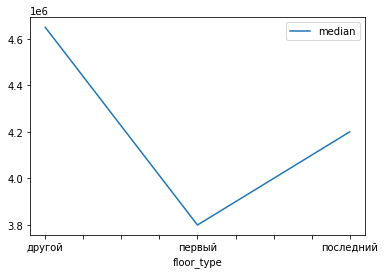

In [82]:
pivot_table_floor_type = data_new.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_type.columns = ['mean', 'count', 'median']
pivot_table_floor_type.plot(y = 'median', legend=True)
pivot_table_floor_type

Медианное значение для квартир на первом этаже самое маленькое. Максимальное - для квартир, находящихся между первым и последним этажами. 

Таким образом, больше всего на стоимость квартиры влияет общая площадь квартиры и этаж расположения. Чем больше площадь, тем выше стоимость. Квартиры на первом/последнем этажах имеют меньшую стоимость. 

3.4

In [83]:
location_with_max_publication = data['locality_name'].value_counts().sort_values(ascending=False).head(10)
print(location_with_max_publication)

Санкт-Петербург      15673
посёлок Мурино         590
Кудрово                471
посёлок Шушары         440
Всеволожск             397
Пушкин                 366
Колпино                337
посёлок Парголово      326
Гатчина                307
Выборг                 235
Name: locality_name, dtype: int64


In [84]:
table_location_with_max_publication = data_new.query('locality_name in @location_with_max_publication.index').pivot_table(index='locality_name', values='one_square_meter_price')
table_location_with_max_publication.sort_values(by='one_square_meter_price', ascending=False)

,one_square_meter_price
locality_name,
Санкт-Петербург,111684.722204
Пушкин,101936.484241
Кудрово,94567.754121
посёлок Парголово,89192.878922
посёлок Мурино,85974.347638
посёлок Шушары,77914.528075
Колпино,74768.674599
Всеволожск,68605.620648
Гатчина,68065.179645


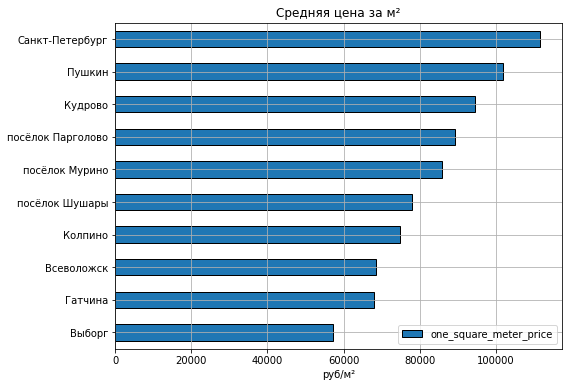

In [85]:
table_location_with_max_publication.sort_values(by='one_square_meter_price').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))

plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

Наибольшая средняя цена за 1 кв м в СПБ - 111742. Наименьшая ср цена из десятки лучших в Выборге - 57011

In [86]:
location_with_min_publication = data['locality_name'].value_counts().sort_values().head(10)
print(location_with_min_publication)

посёлок Семиозерье                                   1
посёлок станции Корнево                              1
деревня Нижние Осельки                               1
деревня Трубников Бор                                1
садовое товарищество Рахья                           1
посёлок при железнодорожной станции Приветнинское    1
деревня Тихковицы                                    1
деревня Вахнова Кара                                 1
деревня Большая Пустомержа                           1
деревня Раздолье                                     1
Name: locality_name, dtype: int64


3.5 Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [87]:
data_spb = data_new.query('locality_name == "Санкт-Петербург"')
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_square_meter_price,day_of_publication,month_of_publication,year_of_publication,floor_type,distance_to_the_center
3,0,64900000,159.000000,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
9,18,5400000,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0
10,5,5050000,39.599998,2017-11-16,1,2.67,12.0,20.299999,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.257439,3,11,2017,другой,14.0
15,16,4650000,39.000000,2017-11-18,1,2.65,14.0,20.500000,5,False,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0,119230.769231,5,11,2017,другой,14.0


In [88]:
len(data_spb)

12437

12474 Объявлений из Питера

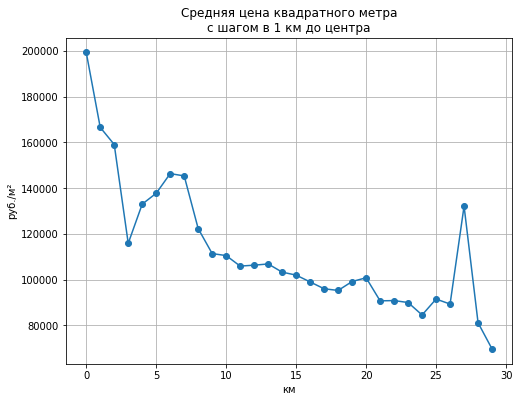

In [89]:
(
data_spb
    .pivot_table(index='distance_to_the_center', values='one_square_meter_price')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Средняя цена квадратного метра\nс шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

После 8 метров наблюдается обратная линейная зависимость. Пик в зоне рядом с центром и в районе 27 км, возможно там какая-то коттеджная зона

### Общий вывод

Наибольшее влияние на стоимость квартиры оказывает ее площадь. Чем больше площадь квартиры, тем выше ее стоимость. Также влияет на стоимость квартир кол-во комнат. Чем их больше, тем выше стоимость. Также влияет расстояние до центра. Чем ближе к центру, тем выше стоимость. 

Самые распространенные квартиры - 1-2-комнатные, в домах с 5-ю /9-ю этажами, общей площадью - 45 кв м, площадью кухонь около 5 метров, с высотой потолка около 2,5 метров и стоимостью 3,5 млн руб, расположенных от центра на 11-16 км, от аэропорта на расстоянии от 15 до 25 км, и до ближайшего парка около 500 метров. 

Квартиры на первом/последнем этажах имеют наменьшую стоимость.

Стоимость квартир падала с 2015 по 2017 год, затем наблюдался рост. Также осенние месяцы квартиры лучше продаются, чем в летние.

Время продажи около 45 - 230 дней. 
Самая высокая средняя стоимость за квадратный метр в 10 самых распространенных населенных пунктах в СПБ - 111742 руб/кв м. 


In [84]:
data.query('locality_name == "Санкт-Петербург"').reset_index(drop=True).pivot_table(index='distance_to_the_center', values='one_square_meter_price')

,one_square_meter_price
distance_to_the_center,
0.0,245833.530130
1.0,177327.462529
2.0,157849.007555
3.0,121387.453684
4.0,133457.094077
5.0,140153.168765
6.0,150059.670745
7.0,155997.405770
8.0,124981.583068
